In [ ]:
#https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/discussion/420633

In [248]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

In [21]:
#Get acquainted with the data
df.head()
df.shape

(7461195, 13)

In [22]:
df.dtypes
df.describe

<bound method NDFrame.describe of          Year of event Event dates                                Event name  \
0                 2018  06.01.2018                       Selva Costera (CHI)   
1                 2018  06.01.2018                       Selva Costera (CHI)   
2                 2018  06.01.2018                       Selva Costera (CHI)   
3                 2018  06.01.2018                       Selva Costera (CHI)   
4                 2018  06.01.2018                       Selva Costera (CHI)   
...                ...         ...                                       ...   
7461190           1995  00.00.1995                 La SainteLyon 65 km (FRA)   
7461191           1995  00.00.1995                 La SainteLyon 65 km (FRA)   
7461192           1995  00.00.1995  Szombathely 24 hours running Race  (HUN)   
7461193           1995  00.00.1995  Szombathely 24 hours running Race  (HUN)   
7461194           1995  00.00.1995  Szombathely 24 hours running Race  (HUN)   

     

In [ ]:
#Clean the data
#Find the USA races, 50km, 50miles in 2020
#Step 1 - only show 50km or 50miles

In [23]:
df[df['Event distance/length'] == '50km']
df[df['Event distance/length'] == '50mi']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [24]:
#combine the 50km and 50mi with isin
df[df['Event distance/length'].isin(['50km', '50mi'])]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [25]:
#filter for 2020 data
df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


In [26]:
#filter for USA events
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [52]:
#combine all filters together
df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [90]:
df2 = df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]
df2.head()
df2.shape

(26090, 13)

In [91]:
#remove USA from event name
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)
df2.head()

C:\Users\Jamie\AppData\Local\Temp\ipykernel_14884\2882577471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [96]:
#clean athlete age column
df2['athlete_age'] = 2020 - df2['Athlete year of birth']

#remove h from athlete performance
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

C:\Users\Jamie\AppData\Local\Temp\ipykernel_14884\2750383253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['athlete_age'] = 2020 - df2['Athlete year of birth']
C:\Users\Jamie\AppData\Local\Temp\ipykernel_14884\2750383253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


In [98]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [100]:
#drop columns: Athlete Club, Athlete Country, Athlete year of birth, Athlete age category
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [102]:
#clean up null values
df2.isna().sum()
df2[df2['athlete_age'].isna()==1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,7.579,398583,NaN


In [104]:
df2 = df2.dropna()
df2.shape

(25857, 10)

In [106]:
#check for duplicates
df2[df2.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [108]:
#reset index
df2.reset_index(drop = True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,62.0
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,43.0
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,58.0
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,39.0


In [110]:
#Fix types
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [112]:
df2['athlete_age'] = df2['athlete_age'].astype(int)

In [114]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                    int32
dtype: object

In [116]:
#rename columns
df2 = df2.rename(columns = {
    'Year of event': 'year',
    'Event dates': 'race_day',
    'Event name': 'race_name',                   
    'Event distance/length': 'race_length',   
    'Event number of finishers': 'race_number_of_finishers',     
    'Athlete performance': 'athlete_performance',           
    'Athlete gender': 'athlete_gender',               
    'Athlete average speed': 'athlete_average_speed',        
    'Athlete ID': 'athlete_id'})                    

In [118]:
df2.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [120]:
#reorder columns
df3 = df2[['race_day', 'race_name', 'race_length', 'race_number_of_finishers', 'athlete_id', 'athlete_gender', 'athlete_age', 'athlete_performance', 'athlete_average_speed']]

In [122]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212


In [150]:
#find two races for comparison
df3.race_name.unique()
df3[df3['race_name']== 'Cape Cod Frozen 50k Race ']

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
2556982,18.01.2020,Cape Cod Frozen 50k Race,50km,33,147501,M,44,4:50:00,10.345
2556983,18.01.2020,Cape Cod Frozen 50k Race,50km,33,813684,M,35,4:57:00,10.101
2556984,18.01.2020,Cape Cod Frozen 50k Race,50km,33,62487,M,44,5:07:00,9.772
2556985,18.01.2020,Cape Cod Frozen 50k Race,50km,33,61709,F,39,5:15:00,9.524
2556986,18.01.2020,Cape Cod Frozen 50k Race,50km,33,350986,M,48,5:17:00,9.464
2556987,18.01.2020,Cape Cod Frozen 50k Race,50km,33,27890,M,60,5:23:00,9.288
2556988,18.01.2020,Cape Cod Frozen 50k Race,50km,33,216417,M,32,5:38:00,8.876
2556989,18.01.2020,Cape Cod Frozen 50k Race,50km,33,216418,F,32,5:38:00,8.876
2556990,18.01.2020,Cape Cod Frozen 50k Race,50km,33,323185,M,24,5:47:00,8.646
2556991,18.01.2020,Cape Cod Frozen 50k Race,50km,33,62488,M,52,5:50:00,8.571


In [152]:
df3[df3['race_name'] == 'Golden Gate 50 km Winter Trail Run ']

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
2627917,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,233777,M,37,4:22:59,11.408
2627918,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,166733,M,42,4:59:33,10.015
2627919,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,295363,M,31,5:05:30,9.820
2627920,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,62717,M,52,5:11:21,9.635
2627921,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,828949,M,30,5:14:08,9.550
2627922,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,810625,M,32,5:29:51,9.095
2627923,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,51104,M,48,5:38:07,8.873
2627924,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,180706,M,51,5:44:08,8.718
2627925,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,697009,F,36,5:46:51,8.649
2627926,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,828950,M,47,5:48:25,8.610


<Axes: xlabel='race_length', ylabel='Count'>

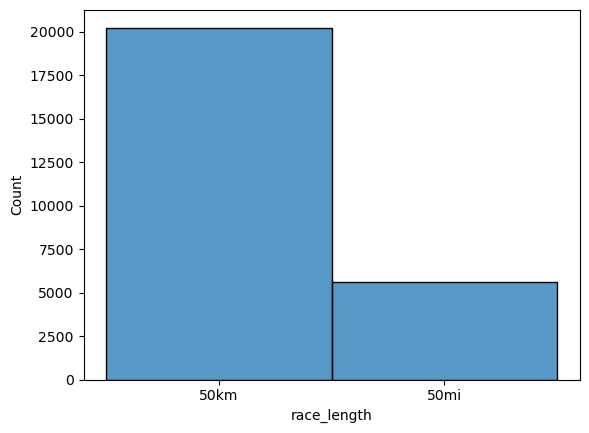

In [156]:
#plot histogram using seaborn
sns.histplot(df3['race_length'])

<Axes: xlabel='race_length', ylabel='Count'>

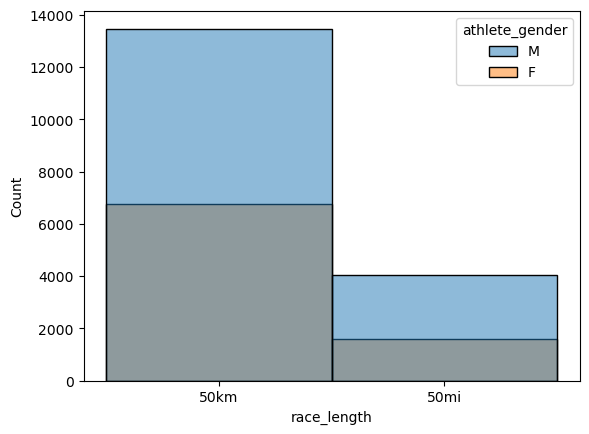

In [160]:
#filter for gender
sns.histplot(df3, x='race_length', hue='athlete_gender')

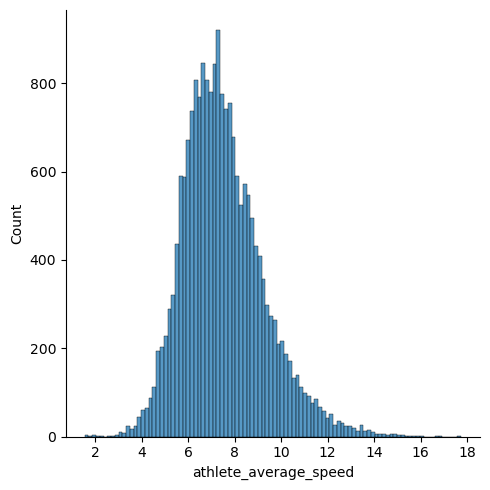

In [176]:
#plot distribution
sns.displot(df3[df3['race_length'] =='50km']['athlete_average_speed'])

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

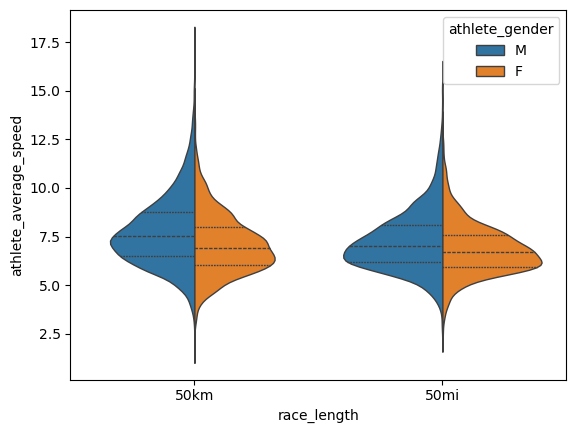

In [186]:
#plot a violin plot
sns.violinplot(df3, x='race_length', y='athlete_average_speed', hue='athlete_gender', split=True, inner='quart', linewidth=1)

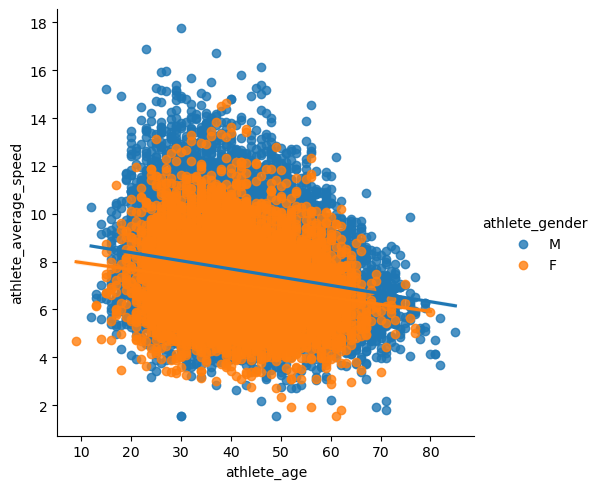

In [190]:
#plot a lmplot
sns.lmplot(df3, x='athlete_age', y='athlete_average_speed', hue='athlete_gender')

(array([[1., 1., 5., 2., 3., 4., 1., 6., 2., 4.],
        [2., 1., 8., 4., 4., 2., 7., 4., 2., 1.]]),
 array([20. , 24.4, 28.8, 33.2, 37.6, 42. , 46.4, 50.8, 55.2, 59.6, 64. ]),
 <a list of 2 BarContainer objects>)

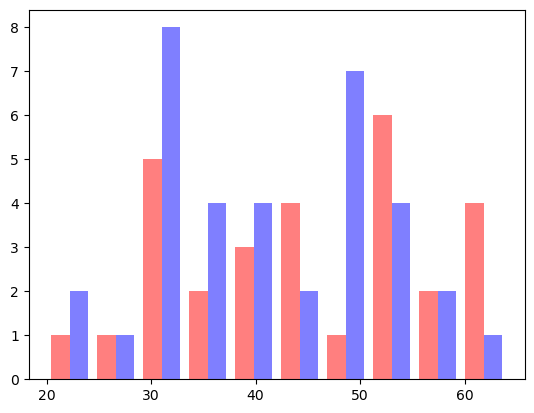

In [269]:
#questions from dataset
df_golden_gate = df3[df3['race_name'] == 'Golden Gate 50 km Winter Trail Run ']
df_cape_cod = df3[df3['race_name'] == 'Cape Cod Frozen 50k Race ']
#plot athlete age comparison between two races
plt.hist([df_cape_cod.athlete_age, df_golden_gate.athlete_age], color=['r','b'], alpha=0.5)

In [258]:
#difference in speed for the 50km Golden Gate vs 50km Cape Cod male to female

In [216]:
df_golden_gate.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 6.85580
             M                 7.89272
Name: athlete_average_speed, dtype: float64

In [218]:
df_cape_cod.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.819833
             M                 8.165261
Name: athlete_average_speed, dtype: float64

In [224]:
#what age groups are the fastest between the two races
df_golden_gate.groupby('athlete_age')['athlete_average_speed'].agg(['mean']).sort_values('mean', ascending = False)

,mean
athlete_age,
37,11.408000
42,10.015000
31,9.820000
32,8.740000
51,8.718000
36,8.649000
30,8.435000
52,8.198500
20,8.071000


In [226]:
df_cape_cod.groupby('athlete_age')['athlete_average_speed'].agg(['mean']).sort_values('mean', ascending = False)

,mean
athlete_age,
35,10.101000
44,10.058500
48,9.464000
32,8.876000
24,8.646000
52,8.535000
57,8.499000
30,8.463000
39,8.360667


Text(0.5, 1.0, 'Distribution of Average Speed of Athletes')

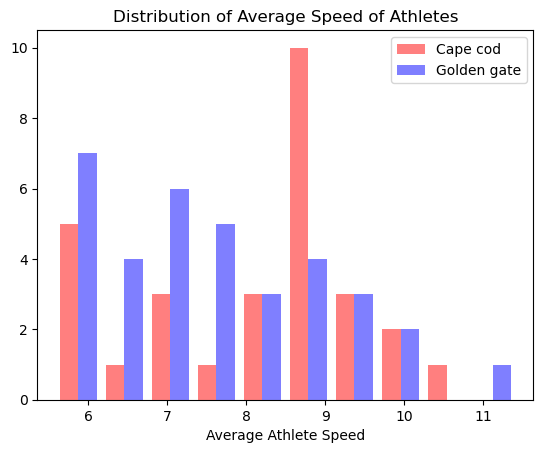

In [375]:
#plot histogram for athlete average speed
plt.hist(x = [df_cape_cod.athlete_average_speed, df_golden_gate.athlete_average_speed] , color=['r','b'], alpha=0.5)
plt.legend(['Cape cod', 'Golden gate'])
plt.xlabel('Average Athlete Speed')
plt.title('Distribution of Average Speed of Athletes')

In [507]:
df_two_races =pd.concat([df_cape_cod, df_golden_gate], ignore_index=True)
df_two_races

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
0,18.01.2020,Cape Cod Frozen 50k Race,50km,33,147501,M,44,4:50:00,10.345
1,18.01.2020,Cape Cod Frozen 50k Race,50km,33,813684,M,35,4:57:00,10.101
2,18.01.2020,Cape Cod Frozen 50k Race,50km,33,62487,M,44,5:07:00,9.772
3,18.01.2020,Cape Cod Frozen 50k Race,50km,33,61709,F,39,5:15:00,9.524
4,18.01.2020,Cape Cod Frozen 50k Race,50km,33,350986,M,48,5:17:00,9.464
...,...,...,...,...,...,...,...,...,...
59,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,19589,M,62,8:19:54,6.001
60,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,48491,M,47,8:41:52,5.749
61,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,369419,F,54,8:48:13,5.679
62,08.02.2020,Golden Gate 50 km Winter Trail Run,50km,35,674236,M,24,8:51:43,5.642


Text(0.5, 1.0, 'Distribution of Age of Athletes')

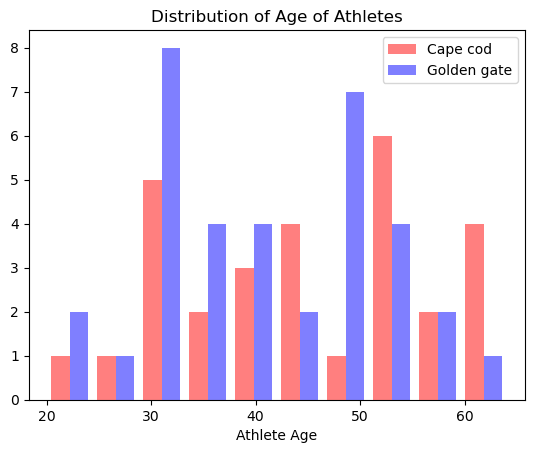

In [579]:
#histogram distribution of age of athletes
plt.hist(x = [df_cape_cod.athlete_age, df_golden_gate.athlete_age] , color=['r','b'], alpha=0.5)
plt.legend(['Cape cod', 'Golden gate'])
plt.xlabel('Athlete Age')
plt.title('Distribution of Age of Athletes')

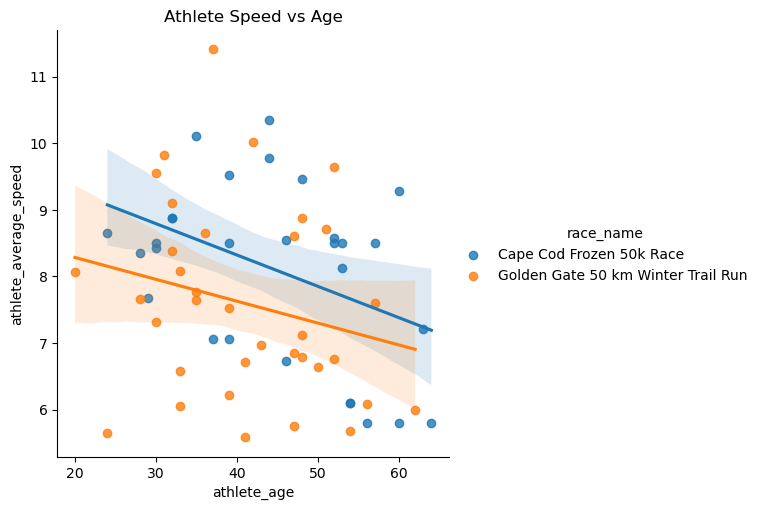

In [577]:
#scatter plot of age vs speed of athletes
sns.lmplot(df_two_races, x='athlete_age', y='athlete_average_speed', hue='race_name').set(title='Athlete Speed vs Age')